# 1. Data and Package Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [2]:
url = 'https://raw.githubusercontent.com/SBM1993/data-science-projects/refs/heads/main/customer-segmentation/data/Mall_Customers.csv'
df = pd.read_csv(url)

# Display First 5 Rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# 2. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.Gender.value_counts()

,count
Gender,
Female,112
Male,88


In [6]:
df.Age.value_counts()

,count
Age,
32,11
35,9
19,8
31,8
30,7
49,7
40,6
38,6
47,6


In [7]:
df['Annual Income (k$)'].value_counts()

,count
Annual Income (k$),
54,12
78,12
48,6
71,6
63,6
...,...
58,2
59,2
16,2


In [8]:
df['Spending Score (1-100)'].value_counts()

,count
Spending Score (1-100),
42,8
55,7
46,6
73,6
35,5
...,...
31,1
44,1
53,1


There doesn't appear to be any data cleaning that needs to be done.

# 3. Exploratory Data Analysis

## 3a. Gender Exploration

In [10]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


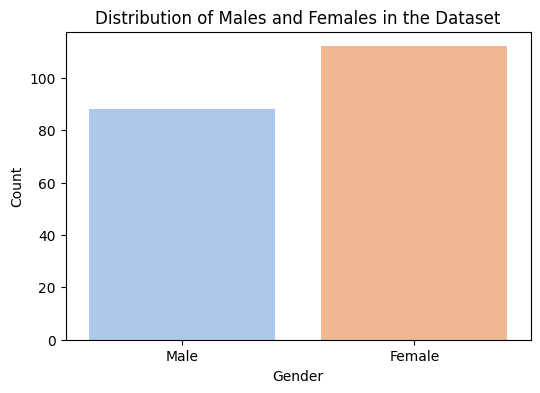

In [11]:
# Count the number of males and females
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Gender'], hue=df['Gender'], palette='pastel', legend=False)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Males and Females in the Dataset')

plt.show()

In [12]:
# Count the number of males and females
gender_counts = df['Gender'].value_counts()

# Calculate the percentage
gender_percentages = (gender_counts / gender_counts.sum())*100

# Display percentages
print(gender_percentages)

Gender
Female    56.0
Male      44.0
Name: count, dtype: float64


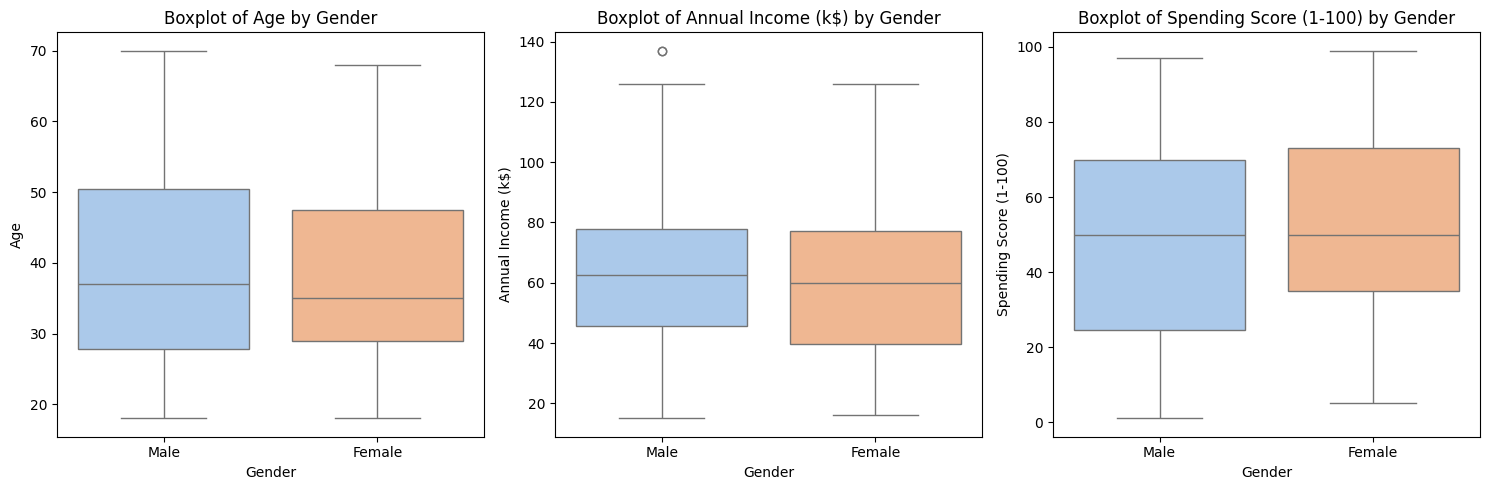

In [13]:
plt.figure(figsize=(15, 5))   # Creates figure that is 15 inches wide and 5 inches tall

# List of numerical columns
num_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# Loop through each variable and plot
for i, col in enumerate(num_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df["Gender"], y=df[col], hue=df["Gender"], palette='pastel', legend=False)
    plt.title(f"Boxplot of {col} by Gender")

plt.tight_layout()
plt.show()


*   No significant gender-based differences in age, annual income, or spending score. A single high-income male outlier exists, but overall trends are similar. If gender impacts customer behavior, it's not reflected in these numerical features.


In [21]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].agg(['mean', 'median'])

Age        Annual Income (k$)        Spending Score (1-100)  \
             mean median               mean median                   mean   
Gender                                                                      
Female  38.098214   35.0          59.250000   60.0              51.526786   
Male    39.806818   37.0          62.227273   62.5              48.511364   

               
       median  
Gender         
Female   50.0  
Male     50.0



*   As you can see from the groupby outputs above, the mean and medians for Age, Annual Income and Spending Score are very similar between genders.



## 3b. Numerical Columns (Age, Annual Income, Spending Score) Exploration

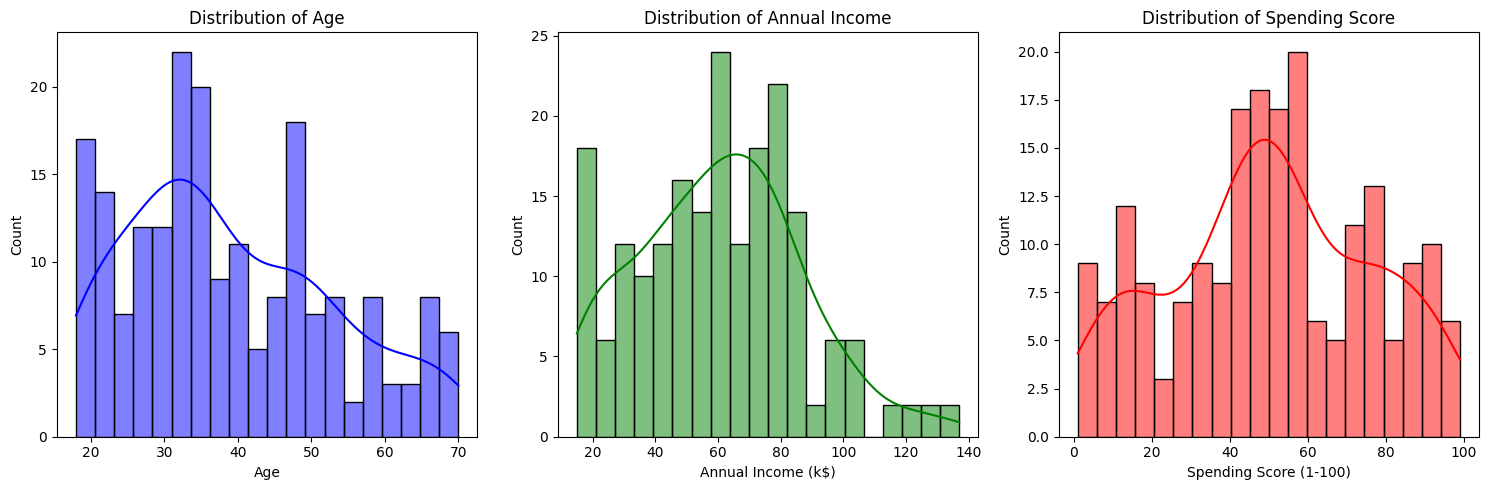

In [14]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Manually plot histograms
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Age')

sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title("Distribution of Annual Income")

sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, ax=axes[2], color='red')
axes[2].set_title("Distribution of Spending Score")

# Adjust layout
plt.tight_layout()
plt.show()

**AGE HISTOGRAM INSIGHTS**
*   The age distribution is multimodal, meaning there are multiple peaks.
*   There seem to be clusters around the early 20s, mid-30s, and 50s-60s.
*   The data is not normally distributed; instead, it appears somewhat bimodal or trimodal, suggesting distinct customer groups
*   There could be different age segments of customers, possibly young and older shoppers


**ANNUAL INCOME HISTOGRAM INSIGHTS**
*   Distribution is mostly right-skewed
*   The KDE curve suggests a peak around $40K-$60K with a long tail extending past $100K.
*   Since there are fewer high-income customers, marketing strategies might need to target mid-income groups more effectively.
*   Further segmentation could reveeal if high-income individuals have distinct spending habits.

**SPENDING SCORE HISTOGRAM INSIGHTS**
*   Distribution is multimodal, meaning there are multiple peaks, around 40-60, 70-90, and 0-20.
*   Most customers are low, moderate, or high spenders.

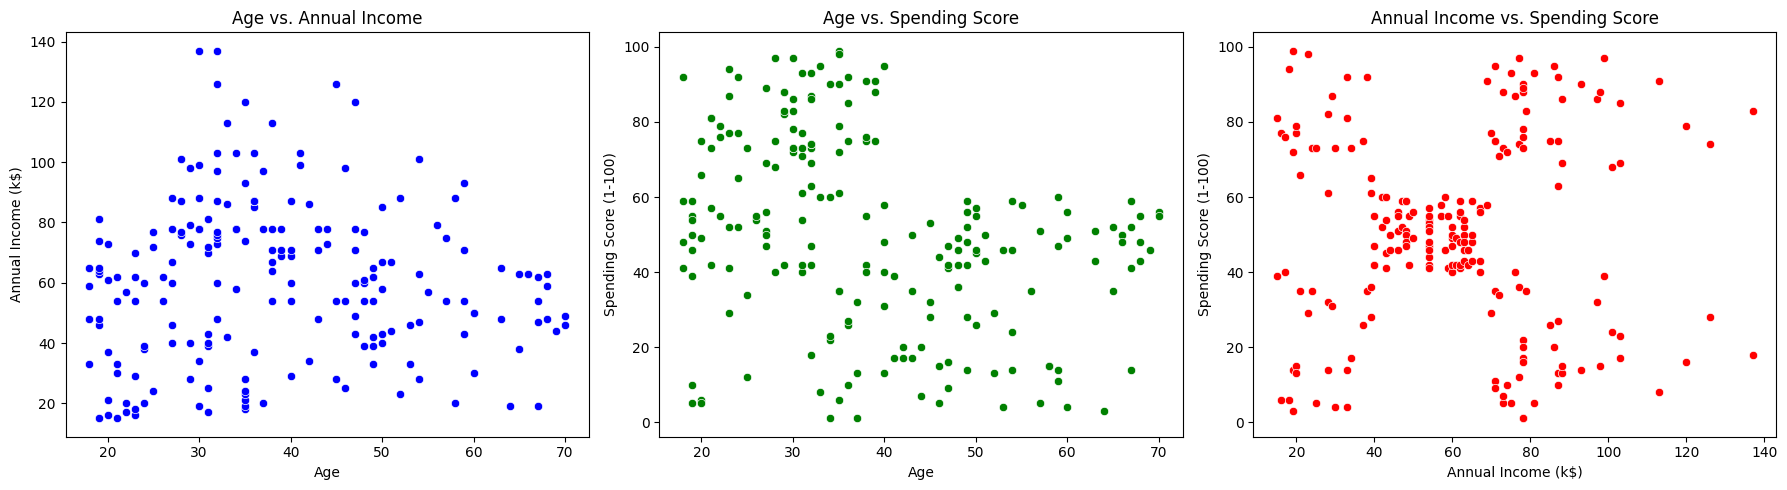

In [15]:
# Define figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Scatter plot for Age vs. Annual Income
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], ax=axes[0], color='blue')
axes[0].set_title('Age vs. Annual Income')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Annual Income (k$)')

# Scatter plot for Age vs. Spending Score
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], ax=axes[1], color='green')
axes[1].set_title('Age vs. Spending Score')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Spending Score (1-100)')

# Scatter plot for Annual Income vs. Spending Score
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], ax=axes[2], color='red')
axes[2].set_title('Annual Income vs. Spending Score')
axes[2].set_xlabel('Annual Income (k$)')
axes[2].set_ylabel('Spending Score (1-100)')

# Adjust layout
plt.tight_layout()
plt.show()


*   There doesn't appear to be any strong correlations between any of the three numeric variables shown above.


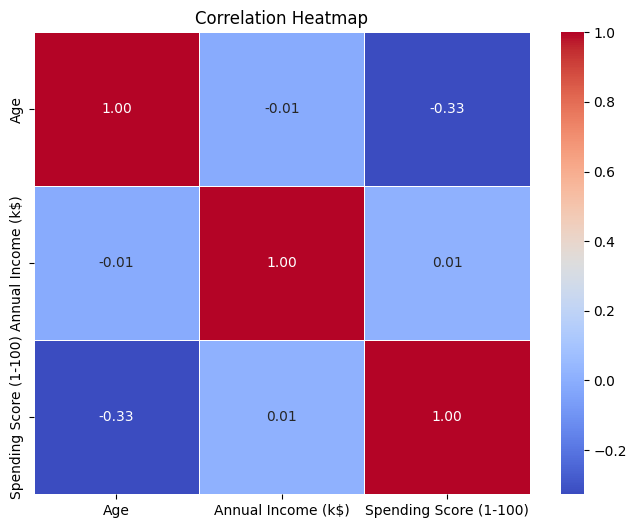

In [16]:
# Compute the correlation matrix
corr_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



*   There is a weak negative correlation between Age and Spending Score, suggesting older indivduals tend to have lower spending scores.
*   Other than that: Annual Income & Spending Score and Age & Annual Income have no meaningful correlations.
*.  The correlation heatmap confirms the three scatterplots above.



# 4. Feature Selection & Preparation

In [17]:
# Select features for clustering (excluding CustomerID)
df_features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()

df_features.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [18]:
# Convert 'Gender' to numeric
df_features['Gender'] = LabelEncoder().fit_transform(df_features['Gender'])

# Scale numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Check the transformed data
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


# 5. Model Training

## 5a. Selecting number of elbows

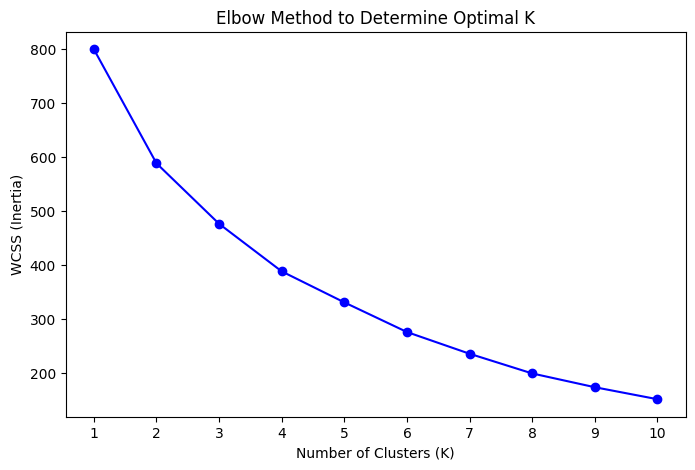

In [19]:
# Define range of clusters to test
wcss = []
K_range = range(1, 11)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Inertia (sum of squared distances to closest centroid)

# Plot the Elbow Method graph
plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method to Determine Optimal K')
plt.xticks(K_range)
plt.show()



*   Though the line is curved, there appears to be a slgiht elbow around number of cluster (3,4). When I run the model, I will look into using both numbers of clusters 3 and 4 to see which gives better segments to my data.



## 5b. Building & running model (3 Clusters)

In [22]:
# Choose K
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit the model
kmeans.fit(df_scaled)

# Assign cluster labels to each data point
df['Cluster'] = kmeans.labels_

# View the first few rows with assigned clusters
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,1


In [24]:
# Get cluster centers in scaled form
cluster_centers = kmeans.cluster_centers_

# Convert back to original scale
original_cluster_centers = scaler.inverse_transform(cluster_centers)

# Create a DataFrame for easy analysis
cluster_df = pd.DataFrame(original_cluster_centers, columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Fixing Gender
cluster_df['Gender'] = cluster_df['Gender'].round().astype(int)

# View the cluster characteristics
print(cluster_df)

   Gender        Age  Annual Income (k$)  Spending Score (1-100)
0       0  28.047059           61.788235               72.882353
1       0  45.075758           57.727273               36.181818
2       1  49.204082           62.244898               29.734694


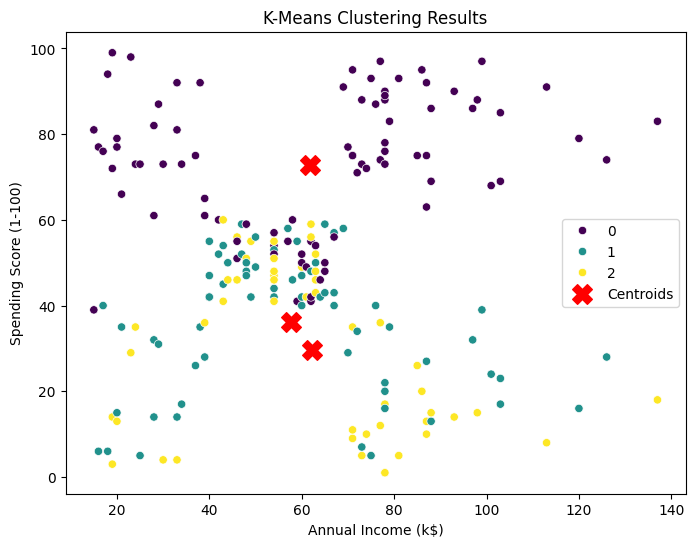

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.scatter(original_cluster_centers[:, 2], original_cluster_centers[:, 3], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

## 5c. Building & running model (4 clusters)

In [29]:
# Choose K
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit the model
kmeans.fit(df_scaled)

# Assign cluster labels to each data point
df['Cluster'] = kmeans.labels_

# View the first few rows with assigned clusters
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


In [30]:
# Get cluster centers in scaled form
cluster_centers = kmeans.cluster_centers_

# Convert back to original scale
original_cluster_centers = scaler.inverse_transform(cluster_centers)

# Create a DataFrame for easy analysis
cluster_df = pd.DataFrame(original_cluster_centers, columns=['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Fixing Gender
cluster_df['Gender'] = cluster_df['Gender'].round().astype(int)

# View the cluster characteristics
print(cluster_df)

   Gender        Age  Annual Income (k$)  Spending Score (1-100)
0       0  47.803571           58.071429               34.875000
1       1  28.000000           62.239130               64.826087
2       0  28.392857           60.428571               68.178571
3       1  52.738095           62.214286               30.642857


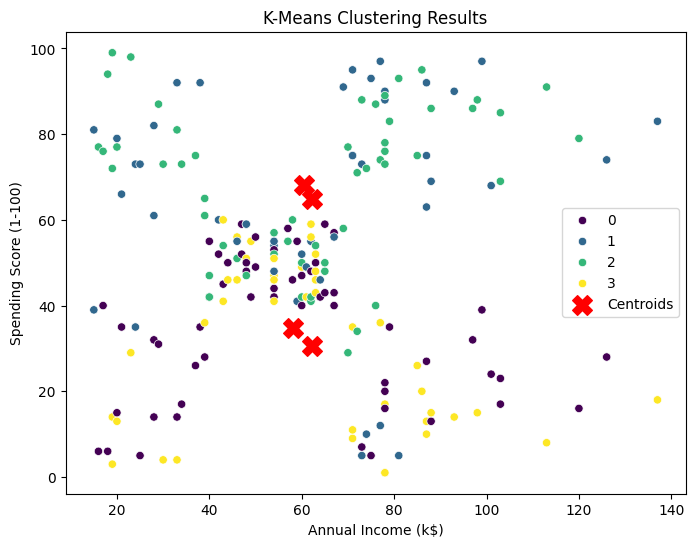

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.scatter(original_cluster_centers[:, 2], original_cluster_centers[:, 3], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

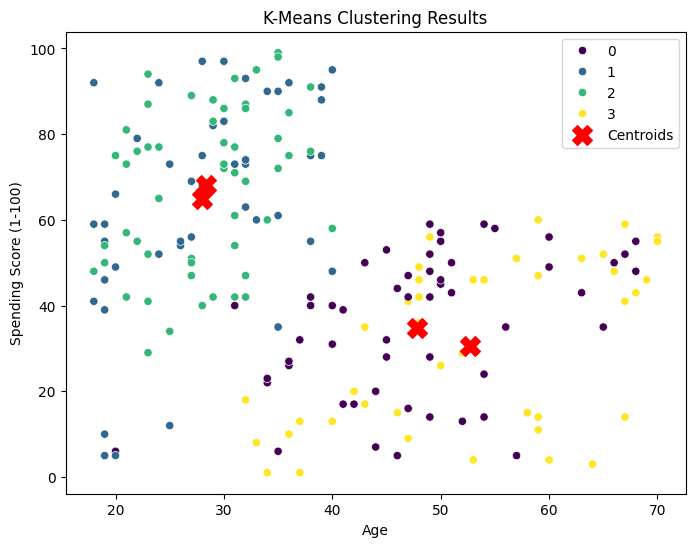

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.scatter(original_cluster_centers[:, 1], original_cluster_centers[:, 3], c='red', marker='X', s=200, label='Centroids')
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

In [32]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
